In [1]:
# This is a comment
# First we import built-in libraries
import random                  
from fractions import Fraction   

# Then some 3rd party libraries
import numpy as np
import pandas as pd
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo

In [2]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

# An example

Pitch material is drawn from J. S. Bach's musical signature (Bb, A, C, B, or BACH in german notation). Bach himself used this motto in this fugue https://youtu.be/CpnfQntMisc?t=576 (the first 4 notes you hear!), where his unrivalled capacity to express creativity and affect within the well-defined (algorithmic?) mechanisms of a fugue is on display.

Now, let's look at this code (which has nothing to do with Bach's fugue!). Can you figure out what is going on in this "piece"? What could the musical idea be? What determines when the piece ends? Is this really one piece?

**The idea behind this piece is to let the letters in the motto "fight against each other for survival". They undergo an aleatoric selection over several iterations. In each iterations, notes are drawn from the motto. Some notes from the motto might be sampled more frequently than the others, which introduces an imbalance. The following iteration is sampled from the output of the preceding iteration, so that imbalances are amplified from iteration to iteration, until just one note survives. When only one note is left, though, there can be no variability anymore. Slowly, the music starts dying. This is represented in the Coda of the piece, where tempo starts to slow down and rhythmic variability is progressively reduced.**

## What the code does:
<div class="alert alert-warning" role="alert">
    <h4 class="alert-heading">Jupyter stylez</h4>
    In Jupyter notebooks, cells often replace functions. In a Python script, we would have probably defined a function, say compose_this(), which would have accepted the arguments (motto, durations, n_bars_per_group, bpm, timeSig) and would have returned the finished piece as a Stream. In Jupyter, however, it is common to define the arguments at the beginning of a cell (all in one place!) and to have the remainder of the cell perform actions based on them. The output is stored in a variable that is, of course, available to all subsequent cells, in this case s. It is also typical to have the cell end with just the output variable so that it gets printed.
</div>

In [3]:
BACH = ['Bb4', 'A4', 'C5', 'B4'] #Define pitch material: BACH motto in octave 4 (with the closest C being C5)
durations = [1.5, 1, 0.5, 0.5, 0.5] #Each bar will comprise these durations, arranged in random order.
# They correspond to a dotted quarter, a quarter, and three eighths, summing up to a 4/4 measure.
# Since there are 5 events and only 4 notes in the motto, each bar will contain at least one repeated note from the motto

n_bars_per_group = 3 #Each iteration comprises 3 bars

bpm = 220 #Set the tempo
timeSig = '4/4' #Set the meter

#Create the main Stream object to contain the generated bars
s = stream.Stream()
s.append(tempo.MetronomeMark(number = bpm))
s.append(meter.TimeSignature('4/4'))

#Initialise measure count
measure_count = 0

#Create a copy of the motto
motto = BACH

#Keep iterating until only one unique note is left in the motto
while len(set(motto)) > 1 :
    
    #In each iteration, there are 3 bars. For each of these 3 bars...
    for bar in range(n_bars_per_group):
        
        #define a measure object numbered according to the measure counter
        m = stream.Measure(measure_count)

        #reorder the durations randomly
        random.shuffle(durations)
    
        #assign a random pitch from motto to each duration in the randomly reordered set of durations
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in durations]
        #insert the notes in the measure 
        m.append(selected_notes)
        
        #append the measure to the stream
        s.append(m)
        
        #update the measure count
        measure_count += 1
    
    #at the end of an iteration, redefine motto as the list of pitches that have been selected in that iteration.
    #This will be the motto for the next iteration
    motto = list(s[-n_bars_per_group:].flat.pitches)


#THE CODA STARTS HERE!
#When only one pitch from the motto is left...

#start discarding the shortest duration
durations = sorted(durations)[1:]

#set a slowing-down factor
slower = 1.5

#Keep iterating until only one duration is left...
while len(durations) >= 1:
    
    #reassign a slowed down tempo
    m.append(tempo.MetronomeMark(number = bpm/slower))
    
    #for each bar in this iteration...
    for bar in range(n_bars_per_group):
        
        #If the sum of the remaining durations is an integer multiple x of a quarter-note, set the meter unit in x/4, otherwise set the meter unit as 2x/8.
        total_duration = sum(durations)
        if int(total_duration) != total_duration:
            n_beats = str(int(2*total_duration))
            unit = '8'
        else:
            n_beats = str(int(total_duration))
            unit = '4'
        
        #Create a measure object with the new meter
        m = stream.Measure(measure_count)
        m.append(meter.TimeSignature(n_beats+'/'+unit))

        #create a copy of the durations and reorder them randomly
        sample_durations = durations.copy()
        random.shuffle(sample_durations)
        
        #create notes with the remaining (shuffled) durations
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in sample_durations]
        
        #append the notes to the measure and the measure to the stream
        m.append(selected_notes)
        s.append(m)
        
        #update measure count
        measure_count += 1
    
    #At the end of the iteration, drop the shortest duration and increase the slowing-down factor
    durations = durations[1:]
    slower += 0.5

## Breakdown of the code for beginners:

In the first part of the cell, we define all values, the parameters, that the following code will use for composing the piece. This includes initialization of the Stream object `s` which contains, at any given moment, the current state of the not-yet-ready piece.

In [4]:
BACH = ['Bb4', 'A4', 'C5', 'B4'] # list of strings
durations = [1.5, 1, 0.5, 0.5, 0.5] # list of floats

n_bars_per_group = 3 # integer variable

bpm = 220
timeSig = '4/4' # string variable

s = stream.Stream() # Stream object
s.append(tempo.MetronomeMark(number = bpm))
s.append(meter.TimeSignature('4/4'))


measure_count = 0 
motto = BACH # passing the value of the constant BACH to the variable motto

`ALL_CAPS` variable names are used for constants, i.e. for set values that never change. This is just a convention because in Python they are normal variables. The value of the constant `BACH` is assigned to the variable `motto`, which is then mutated, i.e. altered during the compositional process.

In [5]:
while len(set(motto)) > 1 :
    for bar in range(n_bars_per_group):
        m = stream.Measure(measure_count)

        random.shuffle(durations)
    
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in durations]
        m.append(selected_notes)
    
        s.append(m)
        
        measure_count += 1
            
    motto = list(s[-n_bars_per_group:].flat.pitches)

while-loops are a different way to achieve iteration: not by iterating through a collection, but instead by performing all indented lines below as long as a certain *condition* is met. Conditions are expressions that evaluate to True or False. For example, you can test equality by writing `1 == 1` into a cell, `==` being the comparison operator as opposed to the assignment operator `=` (try `1 = 2`). Therefore it is essential to make sure when writing a while loop that the condition is not met anymore at some point, otherwise it is an infinite loop. The loop continues as long as `len(set(motto))` is bigger than 1. Turning a list (`motto`) into a set eliminates all duplicate items (and the order is lost, too) which is useful for checking how many *different* items are in the list, namely by checking the set's length using `len()`. In other words, the indented code below will eventually have to reduce the number of distinct items in the list `motto` to 1 in order to terminate.

In every iteration of the while-loop, the body of the for-loop is executed 3 times because that is the value to which we set `n_bars_per_group` before. After the three iterations, a new value is assigned to `motto` (the assignment happens outside the for-loop but within the while-loop). In each iteration of the for loop, a Measure object `m` is created based on the current value of the counter variable (an integer) `measure_count`. The function `random.shuffle()` mutates (i.e. changes the value of) the list `durations` by randomly reordering its elements. Then, the notes of the new measure are computed by a list comprehension and for every note, the pitch is randomly picked from the `motto`. Append the notes to the measure, append the measure to the stream, and augment the counter by one: `measure_count += 1` is just an abbreviation (*syntactic sugar*) for `measure_count = measure_count + 1`.

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">MUTATION!</h4>
    You will encounter only few functions (but many methods) that mutate their argument, as random.shuffle() does. This usually implies that they don't produce an output (except the keyword None), so you wouldn't do <code>output = mutating_function(input)</code>. The more common case is that a function performs a computation on a copy of your input and returns you the manipulated copy, as for example the function <code>sorted()</code> you see below.
</div>

`list()` and `Stream.flat.pitches` we have already seen in the exercise notebook `01.introduction.ipynb`, so let's unpack the `s[-n_bars_per_group:]` and replace the variable with its value, so `s[-3:]`. What you see in the brackets is called *slice notation* and used to select get only a portion of a collection; most prominently of a list which is why music21 has adopted this notation. In short:

* `s[0:3]`: only the first three elements (indices 0, 1, and 2)
* `s[:3]`: zero can be omitted, means the same
* `s[-3:]`: only the last three elements

This means that after every iteration of the while-loop the motto contains only the pitches occurring in the new three measures and it is certain that sooner or later there will be iterations where one of them will not have been not picked by `random.choice()` and therefore drops out.

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">Infinite loop</h4>
    If you're curious, try out this infinite loop. The keyword pass means 'do nothing', and since True is always True, your computer will be doing nothing forever. You can interrupt the process by pressing the 'Interrupt the kernel' button next to the play button.<br>
<code>while True:
    pass</code>
</div>

In [6]:
durations = sorted(durations)[1:]
slower = 1.5
while len(durations) >= 1:
    m.append(tempo.MetronomeMark(number = bpm/slower))
    for bar in range(n_bars_per_group):
        
        total_duration = sum(durations) # sum of a list of floats --> is a float
        if int(total_duration) != total_duration:
            n_beats = str(int(2*total_duration))
            unit = '8'
        else:
            n_beats = str(int(total_duration))
            unit = '4'
            
        m = stream.Measure(measure_count)
        m.append(meter.TimeSignature(n_beats+'/'+unit))

        sample_durations = durations.copy()
        random.shuffle(sample_durations)
        selected_notes = [note.Note(pitch = random.choice(motto), quarterLength = dur) for dur in sample_durations]
        m.append(selected_notes)
    
        s.append(m)
        
        measure_count += 1
    
    durations = durations[1:]
    slower += 0.5

At the beginning and the end of the cell we encounter the slice notation again: after `durations = durations[1:]` the list will have lost its first element. In the case of the first line, it is the first element of a sorted copy of the list, i.e. the lost first element was the shortest one. From here on, `durations` remains sorted, so it does not have to be sorted again at the end. The fact that the list gets shorter after every iteration ensure that the termination condition of the while loop will be met: as soon as it has length 0 (=empty list).

As you see, the while loop follows roughly the same structure as the previous one (create 3 measures, shuffle durations, random-pick (always the same) pitch for creating notes, append). Apart from the lines making the piece `slower`, the additional code accounts for the fact that the list of durations gets shorter and shorter, meaning that they don't add up to a 4/4 bar anymore. Hence, new time signatures need to be introduced to account for the new bar lengths. Also, since we want `durations` to remain sorted, so that the next shortest duration gets eliminated every time, we need to copy it into `sample_durations` before calling `random.shuffle()` (remember, it mutates the input).

The if-else-construct is another one based on a condition, on whether the if-statement evaluates to True (= execute the indented lines below) or to False (= execute the indented lines below `else:`). The expression `int(total_duration)` turns (*a copy of!*) the float `total_duration` into an integer by cutting off all decimals. Therefore, the full expression evaluates to True if `total_duration` is not the float equivalent of an integer---and we know that in this case, it must have a `.5` decimal, so we can express the measure in `/8` rather than `/4` and double the numerator of the fraction. Both numerator and denominators are turned into strings so that can be combined to a string expressing the time signature via `n_beats+'/'+unit`. But before that, `total_duration` (or its doubled version) need to be turned into an integer because otherwise the string would keep the float's `.0` decimal.

# Exercise: Mozart's Würfelspiel

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">elif</h4>
In the following cell you see how several conditions are tested in a row: The first one where the condition is True is the only one that gets to evaluate its code block. If the `if` condition is true, the indented lines below are evaluated, and nothing else; otherwise, the condition of the first `elif` is tested, if its false, the condition of the next one, and so on. If all conditions are false, `else:` gets to run its code. If no `else:` was added, nothing happens.
</div>

In [7]:
def notes_from_list(notes):
    #Takes a list of pitches and durations and returns a list of musci21 Note or Chord objects, as appropriate
    #Each entry in the input list can either be a duration (rest), or in the form [pitchName, duration] (individual note) or [[pitchName1, pitchName2, ...], duration] (chord)
    
    output = []
    for item in notes:
        if type(item) in [int, float]: #rest
            output += [note.Rest(quarterLength = item)]
        elif type(item[0]) == str: #note
            output += [note.Note(item[0], quarterLength = item[1])]
        elif type(item[0] == list): #chord
            output += [chord.Chord(item[0], quarterLength = item[1])]
        else:
            print('Wrong input format')
    return output
    

<div class="alert alert-success" role="alert">
    <h4 class="alert-heading">Tuples</h4>
In the following you see a bunch of nested tuples (in parentheses): They are ordered collections, like lists, but considered immutable. For example, with a tuple t you cannot do t.append(element) because that would change t. Whenever you know that you are not going to manipulate a collection, use tuples (or sets where appropriate) , because they are more memory-efficient. In this small example here it doesn't really matter whether you use lists or tuples, but it is good to stick to this principle.
</div>

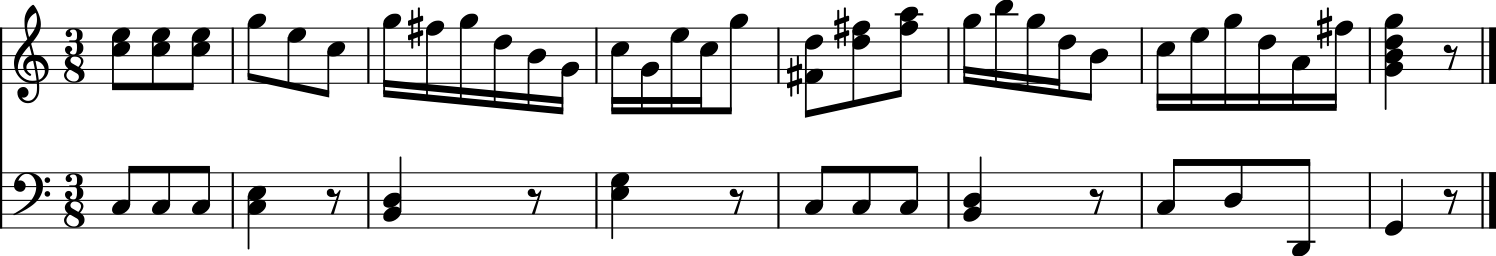

In [8]:
N_bars = 8 #set number of bars

#Options 40 and 54 for bar A
Ar = (
    (('C5', 1/4), ('B4',1/4),('C5', 1/4),('E5', 1/4), ('G4', 1/4), ('C5', 1/4)), 
    ((('C5', 'E5'), 1/2), (('C5', 'E5'),  1/2),(('C5', 'E5'), 1/2))
)
Al = (
    ((('C3', 'E3'), 1),  1/2),  
      (('C3', 1/2), ('C3',  1/2), ('C3', 1/2))
)

#Options 22 and 95 for bar B
Br = (
    (('E5', 1/2), ('C5', 1/2), ('G4', 1/2)),
    (('G5', 1/2), ('E5', 1/2), ('C5', 1/2))
)
Bl = (
    (('C3', 1), 1/2),
    ((('C3', 'E3'), 1), 1/2)
)

#Options 27 and 163 for bar C
Cr = (
    (('F5', 1/4), ('E5', 1/4), ('F5', 1/4), ('D5', 1/4), ('C5', 1/4), ('B4', 1/4)),
    (('G5', 1/4), ('F#5', 1/4), ('G5', 1/4), ('D5', 1/4), ('B4', 1/4), ('G4', 1/4))
)
Cl = (
    ((('G3', 'B3'), 1), 1/2),
    ((('B2', 'D3'), 1), 1/2)
)

#Options 41 and 156 for bar D
Dr = (
    (('C5', 1/4), ('B4', 1/4), ('C5', 1/4), ('E5', 1/4), ('G4', 1/2)),
    (('C5', 1/4), ('G4', 1/4), ('E5', 1/4), ('C5', 1/4), ('G5', 1/2))
)
Dl = (
    ((('C3', 'E3'), 1), 1/2),
    ((('E3', 'G3'), 1), 1/2)
)

#Options 99 and 146 for bar E
Er = (
    (('F#5', 1/2), ('A5', 1/2), ('D5', 1/2)),
    ((('F#4', 'D5'), 1/2), (('D5', 'F#5'), 1/2), (('F#5', 'A5'), 1/2))
    
)
El = (
    ((('C3', 'A3'), 1), (('C3', 'A3'), 1/2)),
    (('C3', 1/2), ('C3', 1/2), ('C3', 1/2))
)

#Options 37 and 133 for bar F
Fr = (
    (('G5', 1/4), ('B5', 1/4), ('G5', 1/4), ('D5', 1/4), ('B4', 1/2)),
    (('D5', 1/2), ('G5', 1/4), ('D5', 1/4), ('B4', 1/4), ('D5', 1/4))  
)
Fl = (
    ((('B2', 'D3'), 1), 1/2),
    ((('B2', 'G3'), 1), 1/2)
)

#Options 21 and 11 for bar G
Gr = (
    (('C5', 1/4), ('E5', 1/4), ('G5', 1/4), ('D5', 1/4), ('A4', 1/4), ('F#5', 1/4)),
    (('E5', 1/4), ('C5', 1/4), ('B4', 1/4), ('A4', 1/4), ('G4', 1/4), ('F#4', 1/4))
)
Gl = (
    (('C3', 1/2), ('D3', 1/2), ('D2', 1/2)),
    (('C3', 1/2), ('D3', 1/2), ('D2', 1/2))
)

#Options 5 and 24 for bar H

Hr = (
    ((('G4', 'B4', 'D5', 'G5'), 1), 1/2),
    ((('G4', 'B4', 'D5', 'G5'), 1), 1/2)
)
Hl = (
    (('G2', 1), 1/2),
    (('G2', 1), 1/2)
)


#Create the score
Menuet = stream.Score()

#Create right-and left-hand parts, in 3/8 meter
RightHand = stream.Part()
RightHand.append(meter.TimeSignature('3/8'))
LeftHand = stream.Part()
LeftHand.append(meter.TimeSignature('3/8'))

#Insert right- and left-hand parts at the beginning of the score
Menuet.insert(0, RightHand)
Menuet.insert(0, LeftHand)

#Lists of all options for each bar, in right and left hand respectively
right = [Ar, Br, Cr, Dr, Er, Fr, Gr, Hr]
left = [Al, Bl, Cl, Dl, El, Fl, Gl, Hl]

#Compose the random Menuet!
for bar in range(N_bars): #for each bar
    flip = random.randint(0,1) #coin toss (randomly select 0 or 1)
    RightHand.append(notes_from_list(right[bar][flip])) #append to right hand the randomly selected option for bar
    LeftHand.append(notes_from_list(left[bar][flip])) #append to left hand the randomly selected option for bar


Menuet.show()

In [9]:
play(Menuet)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
